In [1]:
#Dataframe
import pandas as pd
import numpy as np
# Data visulaization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Machine learning 
import tensorflow as tf


In [2]:
data=pd.read_csv('E:/python/notebooks/data.csv')

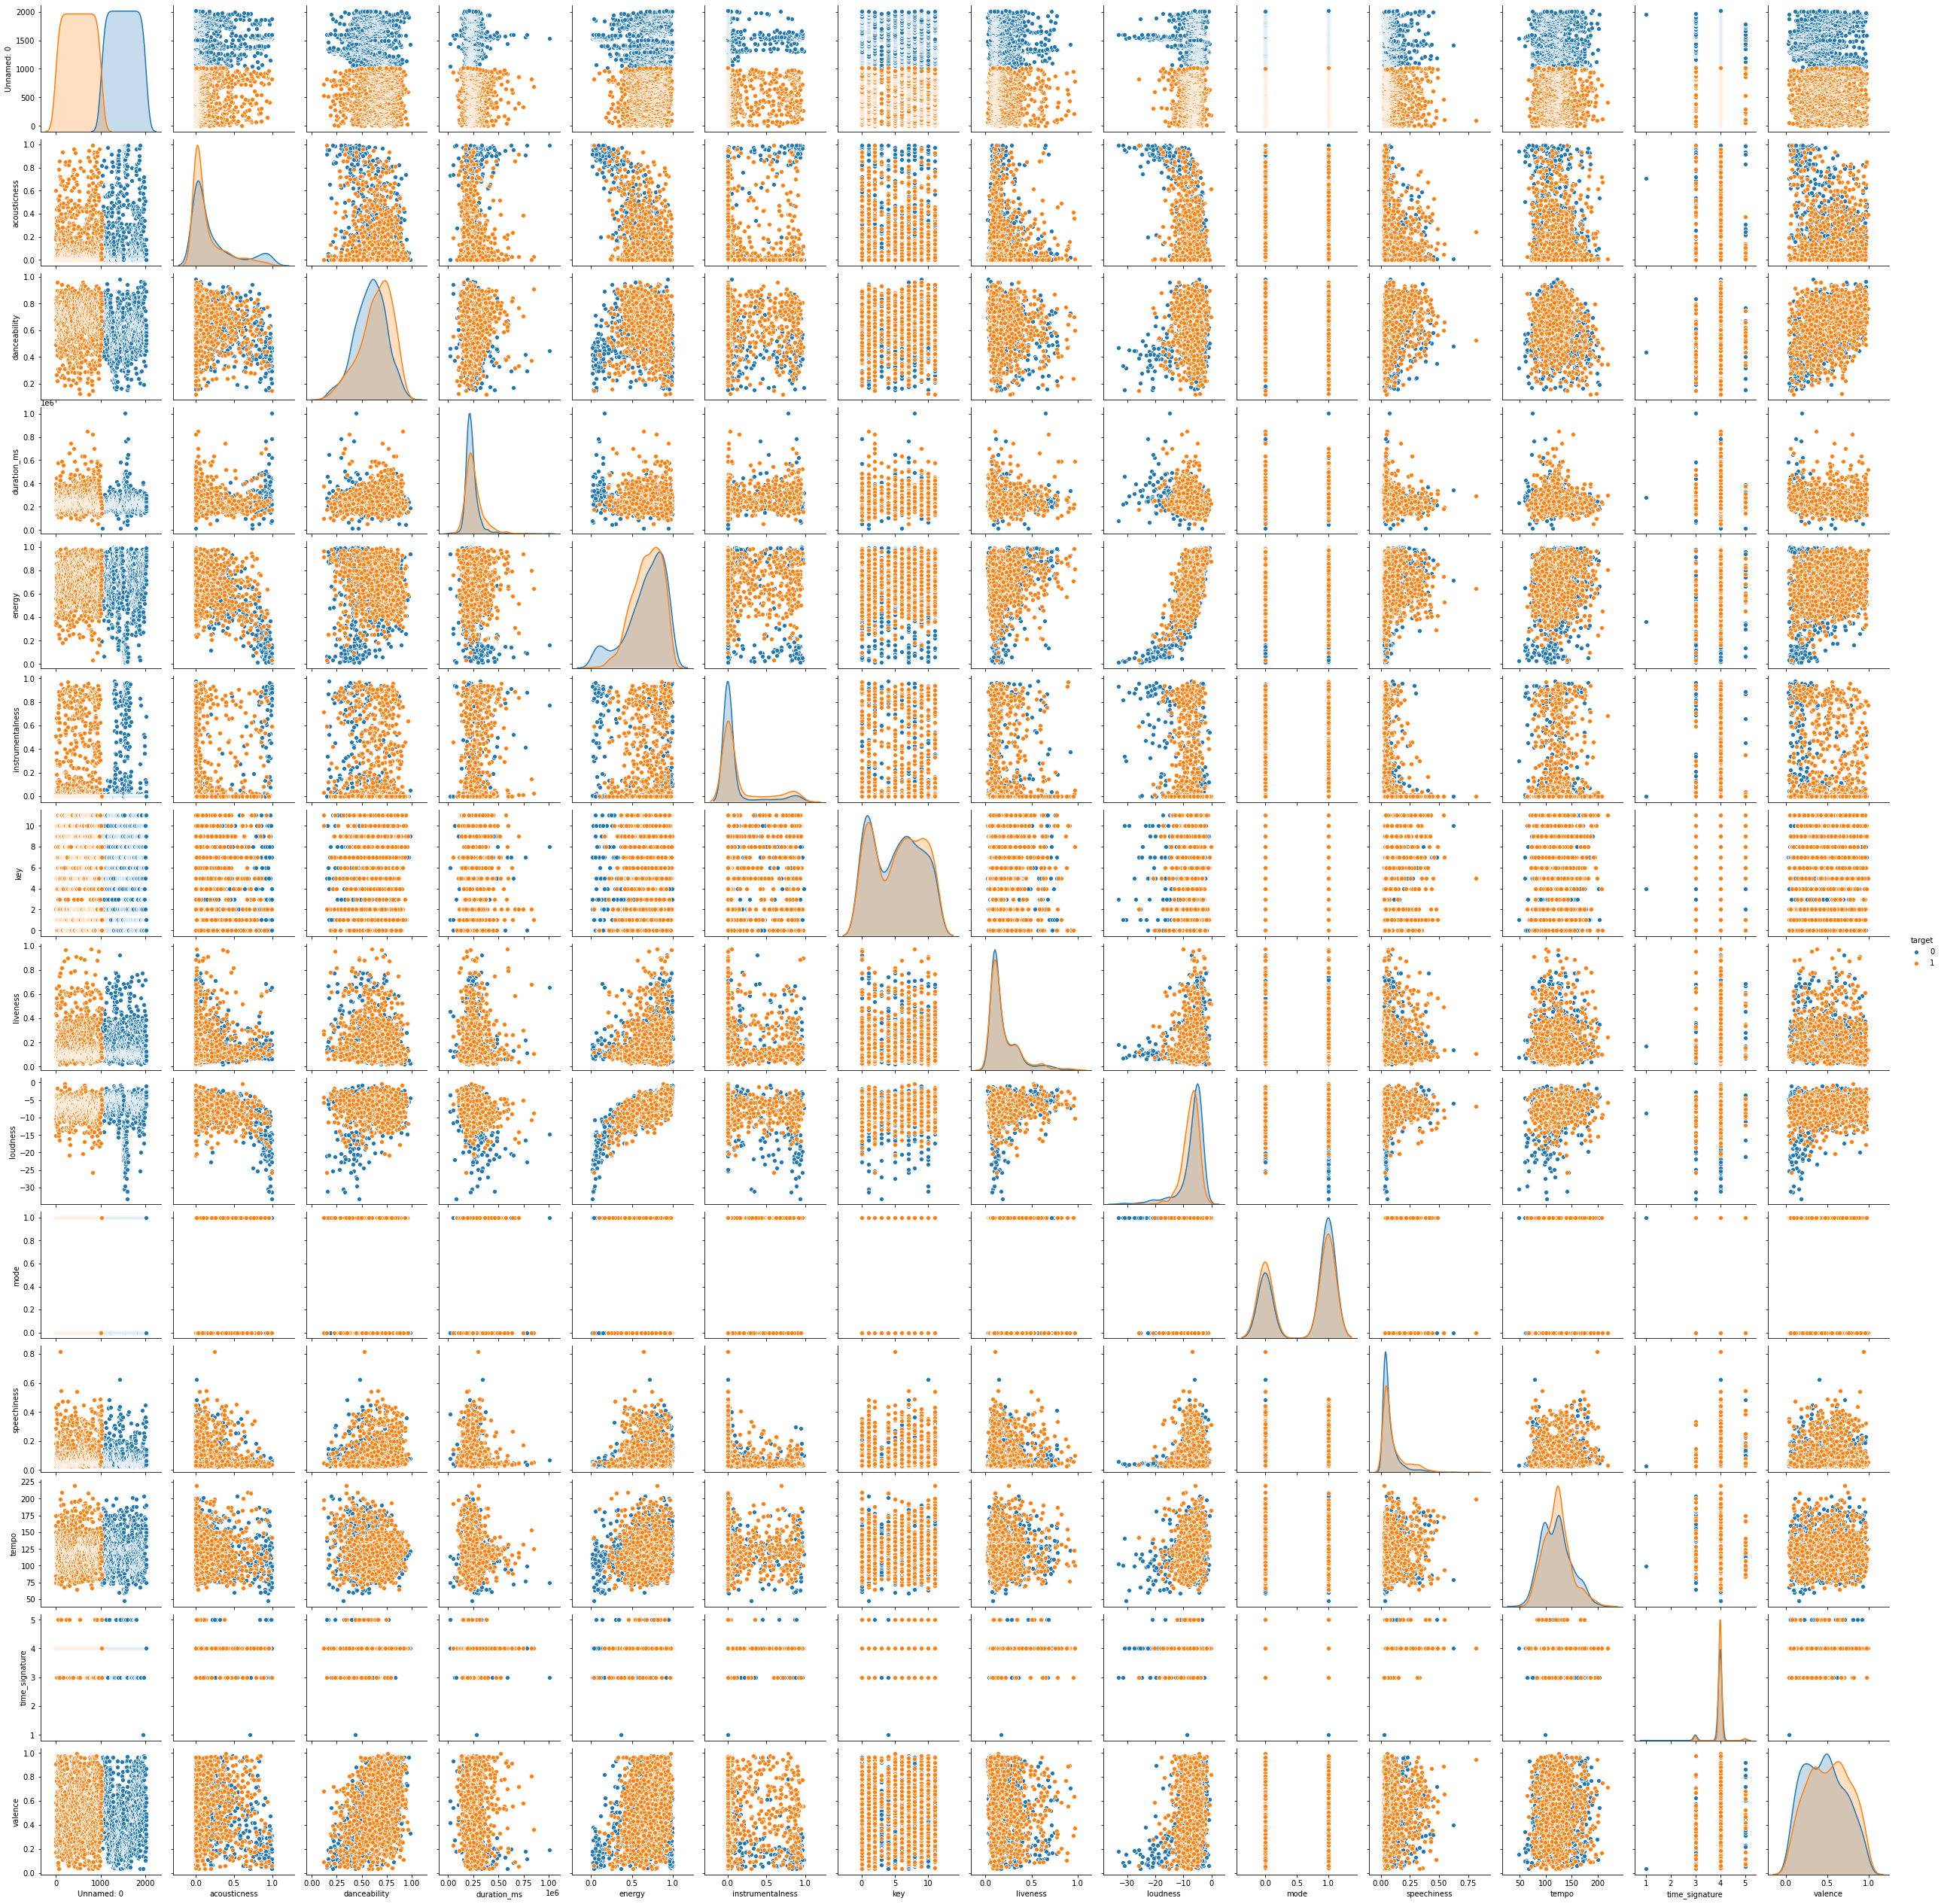

In [20]:
# Data visualization
sns.pairplot(data,kind="scatter",hue='target')

<AxesSubplot:>

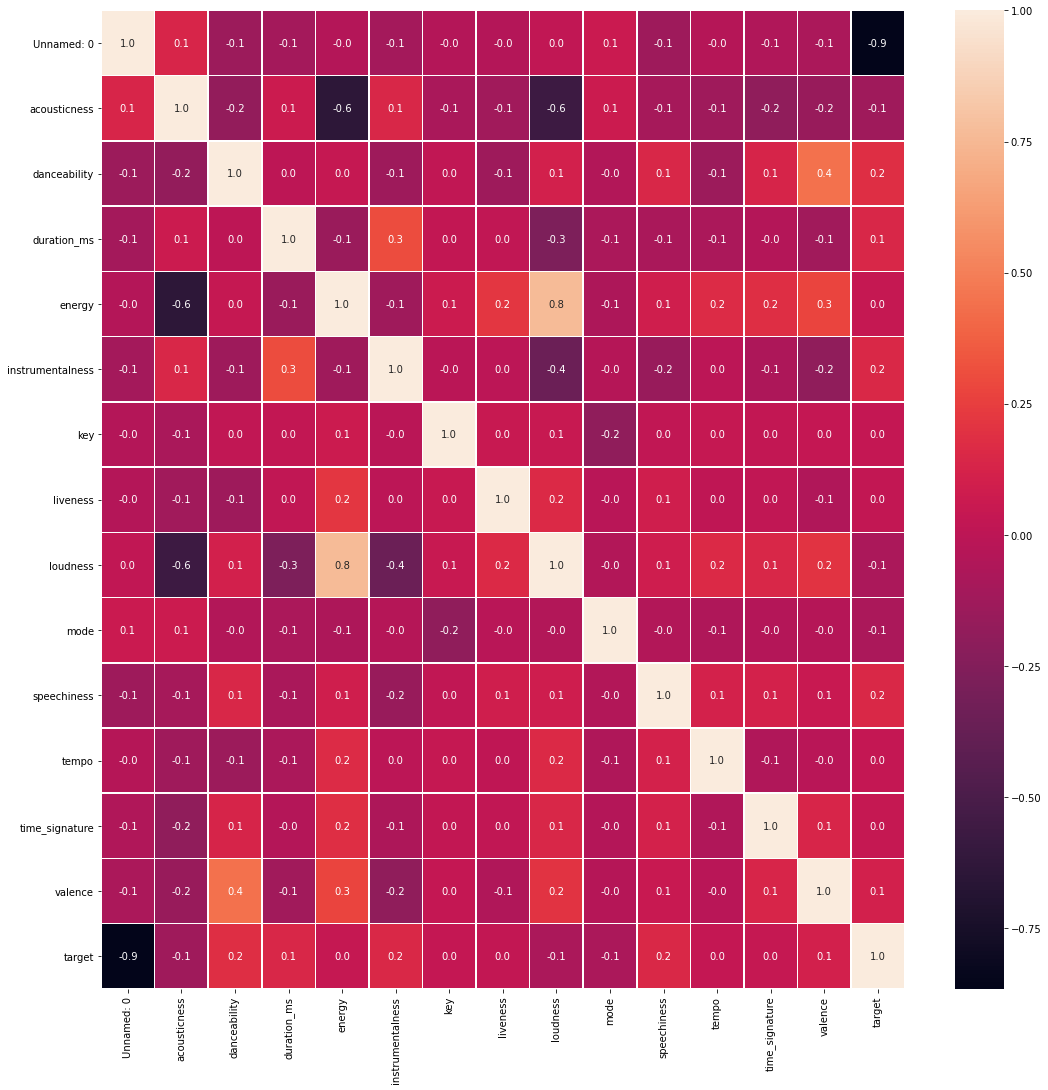

In [21]:
# feature correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [22]:
X= data.iloc[:,1:14]
Y= data.iloc[:,14]

In [23]:
X

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623


In [24]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

In [25]:
#feature normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.68246675,  1.33287384, -0.50885114, ...,  1.06670945,
         0.12404825, -0.8530387 ],
       [ 0.04389718,  0.77382959,  0.98371569, ...,  1.4423234 ,
         0.12404825,  0.36896951],
       [-0.5893629 ,  1.36393186, -0.73936184, ..., -1.74516635,
         0.12404825, -1.31028018],
       ...,
       [-0.68873779,  0.11539969, -0.47712893, ...,  1.0674591 ,
         0.12404825, -0.1085039 ],
       [-0.71539935, -0.38152853, -0.74066733, ...,  1.06479783,
         0.12404825,  0.51059297],
       [-0.71089805, -1.07101644, -0.50982721, ...,  2.56418006,
         0.12404825, -0.38365806]])

In [27]:
## Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [28]:
from keras import Sequential
from keras.layers import Dense


In [29]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(13, activation='relu', kernel_initializer='random_uniform', input_dim=13))
#Second  Hidden Layer
classifier.add(Dense(13, activation='relu', kernel_initializer='random_uniform'))
#Output Layer
classifier.add(Dense(1, activation='relu', kernel_initializer='random_normal'))



In [30]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])


In [31]:
#Fitting the neaural network model with the training dataset
classifier.fit(X_train,y_train, batch_size=20, epochs=100)



Epoch 1/100
91/91 [==============================] - 0s 899us/step - loss: 1.9320 - accuracy: 0.4893
Epoch 2/100
91/91 [==============================] - 0s 899us/step - loss: 1.1310 - accuracy: 0.4893
Epoch 3/100
91/91 [==============================] - 0s 745us/step - loss: 0.7793 - accuracy: 0.5207
Epoch 4/100
91/91 [==============================] - 0s 778us/step - loss: 0.6539 - accuracy: 0.6165
Epoch 5/100
91/91 [==============================] - 0s 745us/step - loss: 0.6277 - accuracy: 0.6496
Epoch 6/100
91/91 [==============================] - 0s 811us/step - loss: 0.6207 - accuracy: 0.6501
Epoch 7/100
91/91 [==============================] - 0s 899us/step - loss: 0.6184 - accuracy: 0.6645
Epoch 8/100
91/91 [==============================] - 0s 953us/step - loss: 0.6152 - accuracy: 0.6672
Epoch 9/100
91/91 [==============================] - 0s 833us/step - loss: 0.6124 - accuracy: 0.6689
Epoch 10/100
91/91 [==============================] - 0s 745us/step - loss: 0.6105 - accura

91/91 [==============================] - 0s 701us/step - loss: 0.5054 - accuracy: 0.7592
Epoch 81/100
91/91 [==============================] - 0s 701us/step - loss: 0.5035 - accuracy: 0.7603
Epoch 82/100
91/91 [==============================] - 0s 778us/step - loss: 0.5034 - accuracy: 0.7587
Epoch 83/100
91/91 [==============================] - 0s 811us/step - loss: 0.5094 - accuracy: 0.7449
Epoch 84/100
91/91 [==============================] - 0s 778us/step - loss: 0.5038 - accuracy: 0.7598
Epoch 85/100
91/91 [==============================] - 0s 712us/step - loss: 0.5002 - accuracy: 0.7598
Epoch 86/100
91/91 [==============================] - 0s 734us/step - loss: 0.4989 - accuracy: 0.7570
Epoch 87/100
91/91 [==============================] - 0s 844us/step - loss: 0.4969 - accuracy: 0.7609
Epoch 88/100
91/91 [==============================] - 0s 734us/step - loss: 0.4967 - accuracy: 0.7598
Epoch 89/100
91/91 [==============================] - 0s 844us/step - loss: 0.4957 - accuracy: 

In [32]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)



In [33]:
len(X_test)

202

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[80 29]
 [24 69]]


In [35]:
cm

array([[80, 29],
       [24, 69]], dtype=int64)

In [36]:
tp=cm[0,0]
tn=cm[1,1]
total=len(y_pred)
accuracy=tp+tn/total
accuracy

80.34158415841584